# Question 2: which word goes usually after previous

# Question 17: repeating messages

# Question 17: repeating messages

In [ ]:
combined_df = pd.concat([groups_df, channels_df], ignore_index=True)

combined_df['message'] = combined_df['message'].fillna('')
combined_df['message_length'] = combined_df['message'].apply(len)
combined_df['dialog_type'] = combined_df['dialog_id'].map(dialog_id_to_type)
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Step 3: Define a function to detect overlapping messages
def find_similar_messages(df, similarity_threshold=80):
    overlapping_messages = []
    
    # Iterate through each message
    for i, row in df.iterrows():
        for j, comp_row in df.iterrows():
            if i >= j:  # Avoid comparing the same message or duplicates
                continue

            # Check similarity using fuzz.ratio
            similarity = fuzz.ratio(row['message'], comp_row['message'])
            
            if similarity >= similarity_threshold:
                overlapping_messages.append({
                    'message_id_1': row['id'],
                    'message_1': row['message'],
                    'dialog_id_1': row['dialog_id'],
                    'user_id_1': row['from_id'],
                    'date_1': row['date'],
                    'message_id_2': comp_row['id'],
                    'message_2': comp_row['message'],
                    'dialog_id_2': comp_row['dialog_id'],
                    'user_id_2': comp_row['from_id'],
                    'date_2': comp_row['date'],
                    'similarity_score': similarity
                })
    
    return pd.DataFrame(overlapping_messages)

# Step 4: Apply the function to find overlapping messages
overlap_df = find_similar_messages(combined_df)

# Step 5: Filter and display results
overlap_df = overlap_df.sort_values(by='similarity_score', ascending=False).head(20)
print("Top 20 Overlapping Messages:")
print(overlap_df)

# Step 6: Visualize the results
plt.figure(figsize=(12, 6))
sns.histplot(overlap_df['similarity_score'], bins=10, kde=True)
plt.title('Distribution of Similarity Scores for Overlapping Messages')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


NameError: name 'dialog_id_to_type' is not defined

# Question 18: user graph

In [ ]:
G = nx.Graph()

for _, row in filtered_df.iterrows():
    from_user = row['from_id']
    to_user = row['to_id']
    if pd.notna(to_user) and from_user != to_user:
        G.add_edge(from_user, to_user)

degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

top_users = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]

top_user_labels = {user_id: f"{user_id_to_name.get(user_id, f'User {user_id}')}\n(@{user_id_to_username.get(user_id, '')})" for user_id, _ in top_users}

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)

nx.draw_networkx_labels(G, pos, labels=top_user_labels, font_size=10, font_color='darkblue')

plt.title("User Interaction Network")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

# Step 1: Ensure the 'date_kyiv' column is timezone-aware and convert to 'Europe/Kyiv' timezone if necessary
filtered_df['date_hour'] = filtered_df['date_kyiv'].dt.tz_convert('Europe/Kyiv').dt.floor('H')

# Step 2: Aggregate message counts by hour
hourly_message_count = filtered_df.groupby('date_hour').size().reset_index(name='message_count')

# Step 3: Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.05, random_state=42)
hourly_message_count['anomaly'] = model.fit_predict(hourly_message_count[['message_count']])

# Mark anomalies
hourly_message_count['is_anomaly'] = hourly_message_count['anomaly'] == -1

# Step 4: Visualize the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_message_count, x='date_hour', y='message_count', label='Message Count', color='blue')
plt.scatter(
    hourly_message_count[hourly_message_count['is_anomaly']]['date_hour'],
    hourly_message_count[hourly_message_count['is_anomaly']]['message_count'],
    color='red',
    label='Anomaly',
    s=50
)
plt.title('Anomaly Detection in Message Activity')
plt.xlabel('Date Hour')
plt.ylabel('Message Count')
plt.legend()
plt.grid(True)
plt.show()


### After trying to find bi-grams th common way, i got this
![image.png](attachment:image.png)

#### So i decided to add all code to stopwatch, because it is not interesting to see that common bi-grams are "signed main" and "int main"
#### Also I added there all links

### After trying to find bi-grams th common way, i got this
![image.png](attachment:image.png)

#### So i decided to add all code to stopwatch, because it is not interesting to see that common bi-grams are "signed main" and "int main"
#### Also I added there all links

In [ ]:
length = 2

In [ ]:
length = 2

In [ ]:
stop_words = set()
with open("/Users/romanmalynovsky/nltk_data/corpora/stopwords/ukrainian", "r", encoding="utf-8") as file:
    for line in file:
        stop_words.add(line.strip().lower())

/var/folders/pc/vqmykl894s313p24rdg7r01w0000gn/T/ipykernel_32780/153230397.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_messages['year'] = user_messages['date_kyiv'].dt.year  # Ensure 'year' column is present
/var/folders/pc/vqmykl894s313p24rdg7r01w0000gn/T/ipykernel_32780/153230397.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trio', data=year_data, palette='viridis')


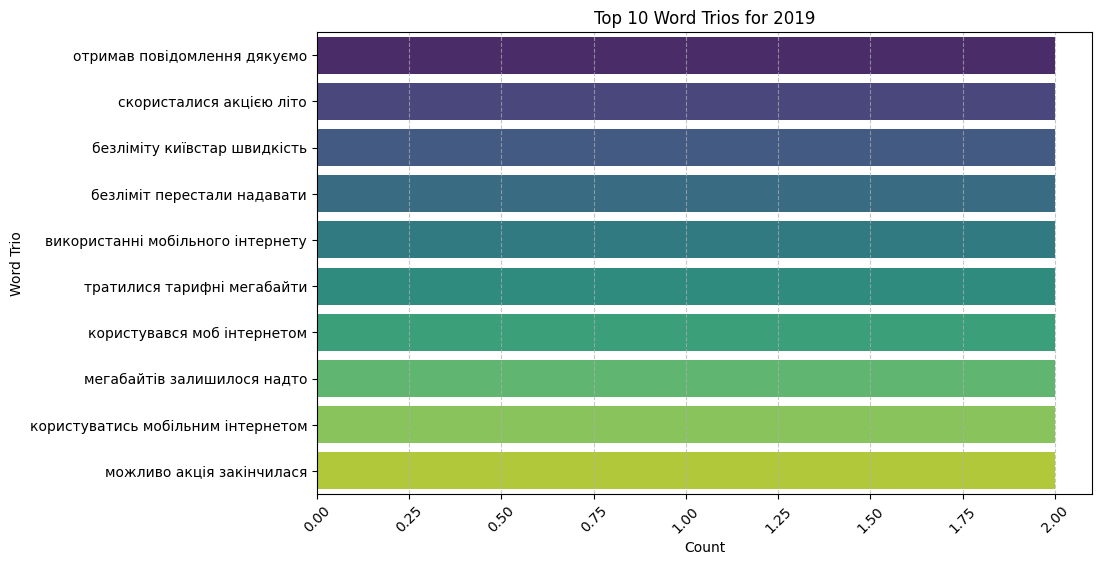

/var/folders/pc/vqmykl894s313p24rdg7r01w0000gn/T/ipykernel_32780/153230397.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trio', data=year_data, palette='viridis')


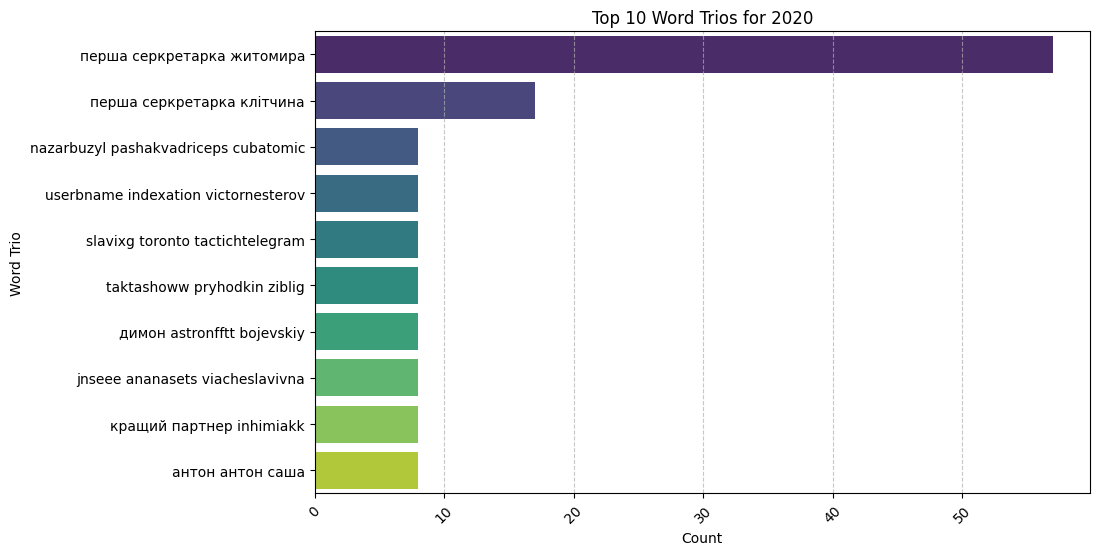

/var/folders/pc/vqmykl894s313p24rdg7r01w0000gn/T/ipykernel_32780/153230397.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trio', data=year_data, palette='viridis')


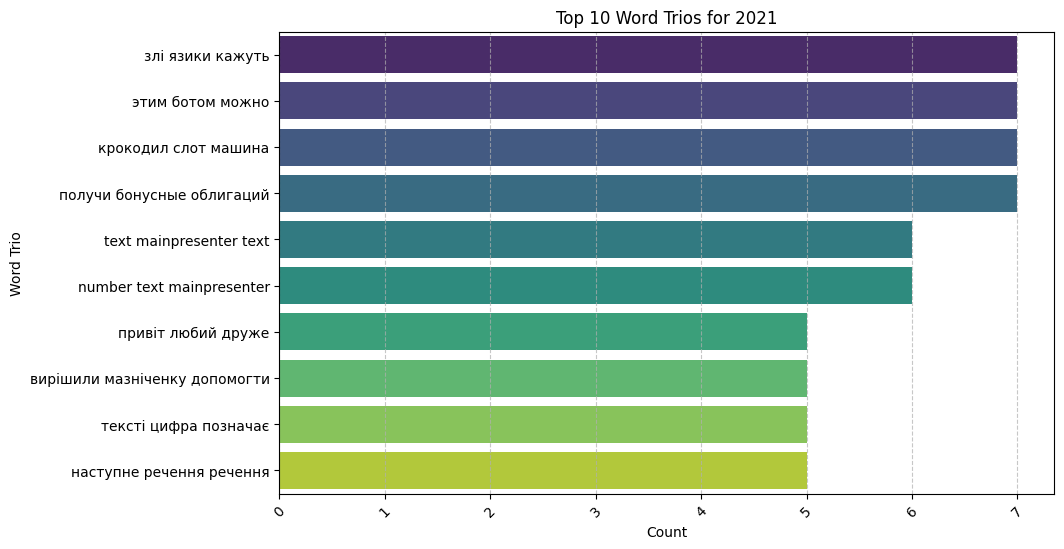

/var/folders/pc/vqmykl894s313p24rdg7r01w0000gn/T/ipykernel_32780/153230397.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trio', data=year_data, palette='viridis')


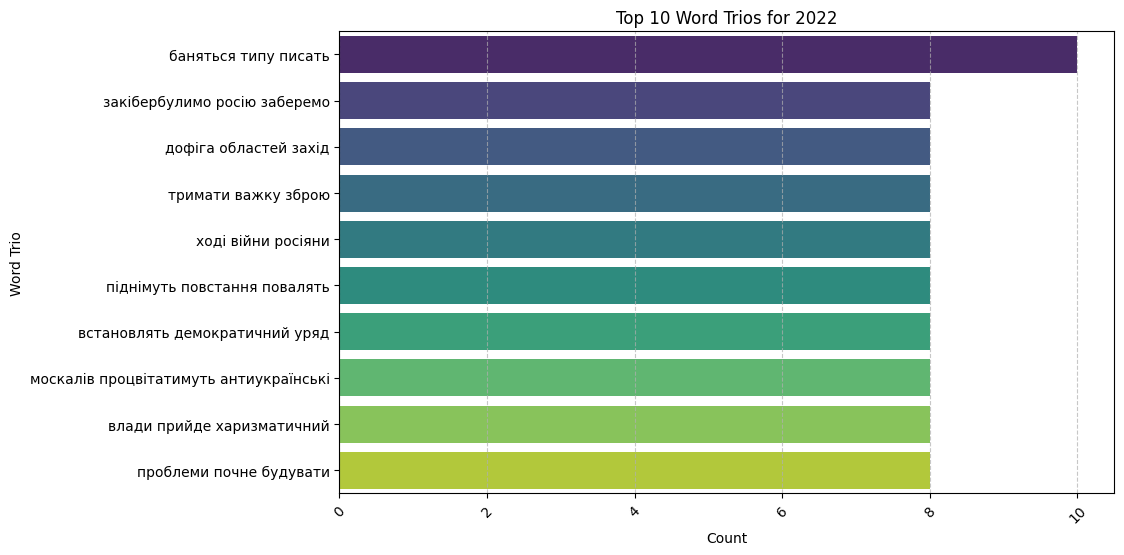

/var/folders/pc/vqmykl894s313p24rdg7r01w0000gn/T/ipykernel_32780/153230397.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trio', data=year_data, palette='viridis')


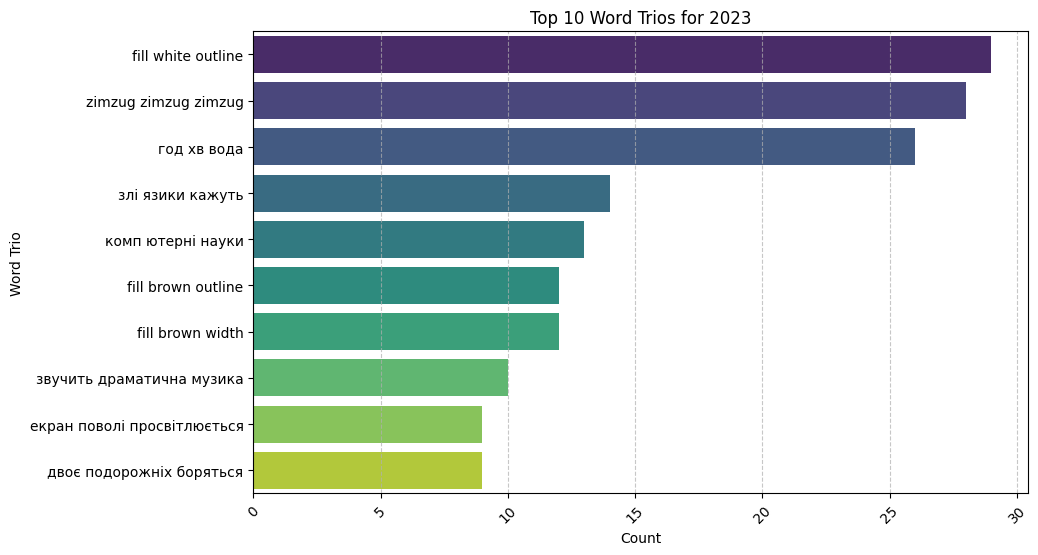

/var/folders/pc/vqmykl894s313p24rdg7r01w0000gn/T/ipykernel_32780/153230397.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trio', data=year_data, palette='viridis')


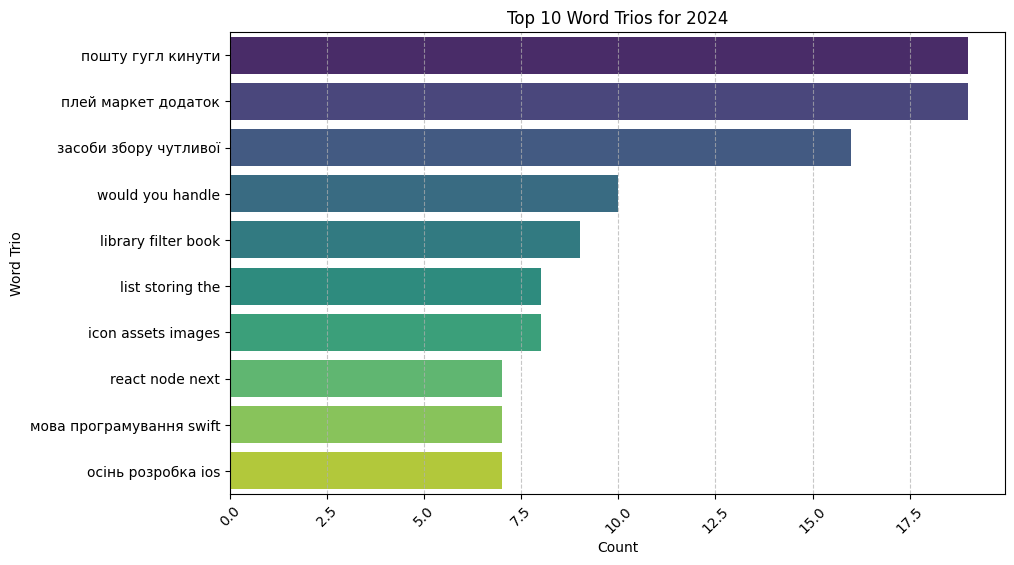

In [ ]:
# Function to extract word trios, ignoring stopwords and links
def get_word_trios(text, length=3):
    # Define regex for words and links
    word_pattern = r'\b[a-zA-Zа-яА-ЯїЇєЄіІґҐ]+\b'
    link_pattern = r'https?://\S+|www\.\S+'

    # Remove links from text
    text = re.sub(link_pattern, '', text.lower())
    words = re.findall(word_pattern, text)  # Extract words only

    trio = []
    for word in words:
        if word not in stop_words and not word.startswith("@"):
            trio.append(word)
            if len(trio) == length:
                yield tuple(trio)
                trio = []
        else:
            trio = []

# Extract and count word trios for each year
user_messages['year'] = user_messages['date_kyiv'].dt.year  # Ensure 'year' column is present
trios_by_year = {}

for year, group in user_messages.groupby('year'):
    all_word_trios = []
    for message in group['message'].dropna():
        trios = list(get_word_trios(message))
        all_word_trios.extend(trios)
    
    # Count the most common word trios
    word_trio_counts = Counter(all_word_trios)
    trios_by_year[year] = word_trio_counts.most_common(10)  # Top 10 trios per year

# Convert to DataFrame for plotting
trio_data = []
for year, trios in trios_by_year.items():
    for trio, count in trios:
        trio_data.append((year, ' '.join(trio), count))

trio_df = pd.DataFrame(trio_data, columns=['year', 'trio', 'count'])

# Plotting the results
for year in trio_df['year'].unique():
    year_data = trio_df[trio_df['year'] == year]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='trio', data=year_data, palette='viridis')
    plt.title(f'Top 10 Word Trios for {year}')
    plt.xlabel('Count')
    plt.ylabel('Word Trio')
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()
